In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive/DSP/simplified_data /content/data

vocal


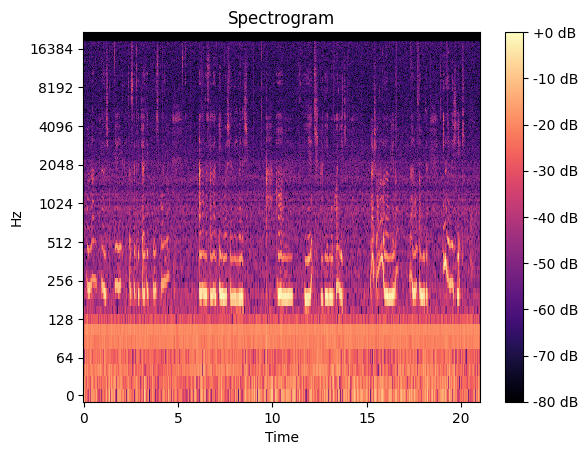

music


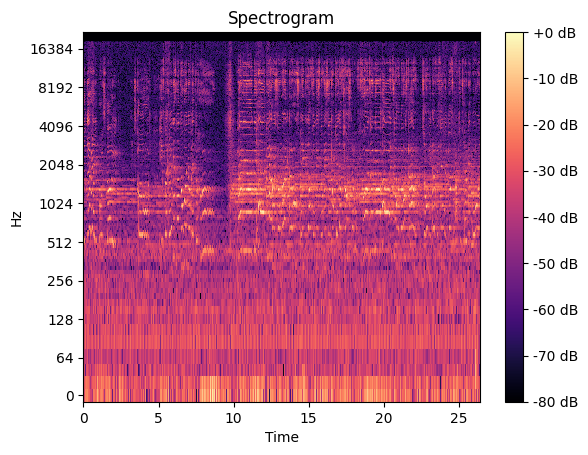

In [3]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def spec(audio_file_path):
    # Load the audio file
    y, sr = librosa.load(audio_file_path, sr=None)

    # Calculate the short-time Fourier transform (STFT)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Display the spectrum
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

# Replace 'your_audio_file.wav' with the path to your audio file
audio_file_path = '/content/data/dataset_new/file1.mp3'
print("vocal")
spec(audio_file_path)

audio_file_path = '/content/data/dataset_new/file14.mp3'
print("music")
spec(audio_file_path)

a data of vocal, music, and both, and the labels are 0 for music, 1for vocal and 2 for both for each track

then I get every 5 seconds of the track and use the corresponding label.

then get the mfcc features of the audio segments which is feartures for audio proccessing.

I give the features and the labels to SVM to train the model

In [4]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define a function to extract features from audio samples
def extract_features(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract MFCC features
    return np.mean(mfccs, axis=1)  # Return mean values of MFCCs as features

# Specify the directory containing your audio files
data_dir = '/content/data/dataset_new'

# Specify the path to the text file containing labels
labels_file_path = '/content/data/dataset_new/labels.txt'

# Read labels from the text file
with open(labels_file_path, 'r') as labels_file:
    labels = [int(line.strip()) for line in labels_file]

# Collect file paths
file_paths = [os.path.join(data_dir, ('file' + str(i + 1) + '.mp3')) for i in range(len(os.listdir(data_dir)) - 1)]

# Initialize lists to store segmented features and labels
segmented_features = []
segmented_labels = []

# Extract features for each audio file and segment into windows
window_size = 5  # in seconds

for file_path, label in zip(file_paths, labels):
    y, sr = librosa.load(file_path, sr=None)

    # Calculate the number of windows
    num_windows = int(np.floor(len(y) / (window_size * sr)))

    # Extract features and labels for each window
    for i in range(num_windows):
        start = i * window_size * sr
        end = (i + 1) * window_size * sr
        segment = y[start:end]

        # Extract features from the 5-second segment
        segment_features = extract_features(segment, sr)

        # Append features and label to the lists
        segmented_features.append(segment_features)
        segmented_labels.append(label)

# Convert features and labels to NumPy arrays
X = np.array(segmented_features)
y = np.array(segmented_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Support Vector Machine (SVM) classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 93.62%


In [5]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define a function to extract features from audio samples
def extract_features(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract MFCC features
    return np.mean(mfccs, axis=1)  # Return mean values of MFCCs as features

# Specify the directory containing your audio files
data_dir = '/content/data/dataset_new'

# Specify the path to the text file containing labels
labels_file_path = '/content/data/dataset_new/labels.txt'

# Read labels from the text file
with open(labels_file_path, 'r') as labels_file:
    labels = [int(line.strip()) for line in labels_file]

# Collect file paths
file_paths = [os.path.join(data_dir, ('file' + str(i + 1) + '.mp3')) for i in range(len(os.listdir(data_dir)) - 1)]

# Initialize lists to store segmented features and labels
segmented_features = []
segmented_labels = []

# Extract features for each audio file and segment into windows
window_size = 5  # in seconds

for file_path, label in zip(file_paths, labels):
    y, sr = librosa.load(file_path, sr=None)

    # Calculate the number of windows
    num_windows = int(np.floor(len(y) / (window_size * sr)))

    # Extract features and labels for each window
    for i in range(num_windows):
        start = i * window_size * sr
        end = (i + 1) * window_size * sr
        segment = y[start:end]

        # Extract features from the 5-second segment
        segment_features = extract_features(segment, sr)

        # Append features and label to the lists
        segmented_features.append(segment_features)
        segmented_labels.append(label)

# Convert features and labels to NumPy arrays
X_train = np.array(segmented_features)
y_train = np.array(segmented_labels)


# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Train a Support Vector Machine (SVM) classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)


SVC(kernel='linear')

to test the model I made a test file cosisting of two input channel of music and vocal in way that at the first 10 sec its only vocal then the rest is both.

In [7]:
from pydub import AudioSegment

# Load the separated audio
vocal_audio = AudioSegment.from_file('/content/data/dataset_test/test13-vocal.mp3')
music_audio = AudioSegment.from_file('/content/data/dataset_test/test13-music.mp3')

vocal_audio=vocal_audio[:30*1000]
music_audio=music_audio[:20*1000]

vocal_only = vocal_audio[:11 * 1000]

vocal_to_mix = vocal_audio[11 * 1000:]

music_to_mix = music_audio

mix = music_to_mix.overlay(vocal_to_mix)

final = vocal_only + mix

final.export('/content/vocalthenboth_test.mp3', format='mp3')

<_io.BufferedRandom name='/content/vocalthenboth_test.mp3'>

another test is the first 5 sec is only music then both

In [ ]:
# Load the separated audio
vocal_audio = AudioSegment.from_file('/content/data/dataset_test/test13-vocal.mp3')
music_audio = AudioSegment.from_file('/content/data/dataset_test/test13-music.mp3')

vocal_audio=vocal_audio[:25*1000]
music_audio=music_audio[:30*1000]-10

music_only = music_audio[:5 * 1000]

music_to_mix = music_audio[5 * 1000:]

vocal_to_mix = vocal_audio

mix = vocal_to_mix.overlay(music_to_mix)

final = music_only + mix

final.export('/content/musicthenboth_test.mp3', format='mp3')

<_io.BufferedRandom name='/content/musicthenboth_test.mp3'>

In [8]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Function to extract features from a segment
def extract_features(segment):
    mfccs = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=13)
    return np.mean(mfccs, axis=1)

# Function to create a spectrogram plot
def plot_spectrogram(segment, label):
    powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(segment, Fs=sr)
    plt.title(f'Spectrogram - Label: {label}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

# Specify the path to the test audio file
# test_file_path = '/content/musicthenboth_test.mp3'
test_file_path = '/content/vocalthenboth_test.mp3'

# Load the test audio file
y, sr = librosa.load(test_file_path, sr=None)

# Specify the duration of each window (5 seconds)
window_duration = 5

# Initialize lists to store features and labels
features = []

# Flag to indicate whether music has started
music_started = False

# Extract features and labels for each window
for i in range(0, len(y), window_duration * sr):
    start = i
    end = i + window_duration * sr
    segment = y[start:end]

    # Extract features from the segment
    segment_features = extract_features(segment)

    # Append features and label (1 for vocal, 2 for both music and vocal)
    features.append(segment_features)


# Convert features to NumPy array
X_test = np.array(features)

# Standardize features
X_test = scaler.fit_transform(X_test)


# Make predictions on the test set
y_pred = clf.predict(X_test)

In [9]:
y_pred

array([1, 1, 2, 0, 0, 2, 0])

In [10]:
# Find the time when music starts based on the label sequence (1 followed by 2 or 1 followed by 0)
music_start_time = -1
vocal_start_time = -1

for i in range(len(y_pred) - 2):
    if y_pred[i] == 1 and (y_pred[i + 1] == 2 or y_pred[i + 1] == 0):
        music_start_time = (i + 1) * window_duration
        break  # Exit loop if music sequence is found


for i in range(len(y_pred) - 2):
    if y_pred[i] == 0 and (y_pred[i + 1] == 1 or y_pred[i + 1] == 2):
        vocal_start_time = (i + 1) * window_duration
        break  # Exit loop if vocal sequence is found

# Print the result based on the search
if music_start_time != -1 and music_start_time < vocal_start_time:
    print(f"Music starts at {music_start_time} seconds.")
elif vocal_start_time != -1:
    print(f"Vocal starts at {vocal_start_time} seconds.")
else:
    print("No sequence found.")


Music starts at 10 seconds.


In [14]:
vocal_start_time

25

In [15]:
if vocal_start_time != -1 and vocal_start_time < music_start_time:
  music_only = music_audio[:(vocal_start_time+1)*1000]
  music_to_mix = music_audio[(vocal_start_time+1)*1000:]-20

  final = music_only + vocal_audio.overlay(music_to_mix)

  final.export('/content/musicthenboth_result.mp3', format='mp3')
  print(1)
else:
  vocal_only = vocal_audio[:(music_start_time+1)*1000]

  final = vocal_only + music_audio

  final.export('/content/vocalthenboth_result.mp3', format='mp3')
  print(2)

2


the model predict the label for each 5 sec and after that I search for sequence of 0 followed by 2 or 1 which means music then both
then for making the result I put the original music until the time of vocal_start_time and after thet lowered the music then combined it with the vocal

and for the case that we have a music_start_time which is sequence of 1 followed by 2 or 0, I used the original vocal until the time of music_start_time and then the music until the end so no trace of vocal at that time.